Una maschera può essere definita sia in termini di {1,0} che in termini di {True,False}.

può essere usata per settare i pixel scelti al valore obiettivo, e.g.

        img[mask] = VALUE



L'operazione di applicazione del filtro è irreversibile, o almeno, non è possibile ottenere esattamente le stesse informazioni. 

effettuando

blurred + alpha * (blurred - filter_blurred)

permette, limitatamente, di riottenere l'info di partenza. doe filter blurred è l'applicazione del filtro gaussiano all'immagine già filtrata.

ImageFolder(IMAGE_DATASET, transform=transform.ToTensor())

Poiché le reti neurali accettano input a size prefissata, molto spesso è necessario effettuare la resize.



        transformations = T.Compose([
            T.Resize((32,32)),
            T.ToTensor(),
        ])

Possiamo definire una composizione di trasformazioni che verranno eseguite in sequenza.

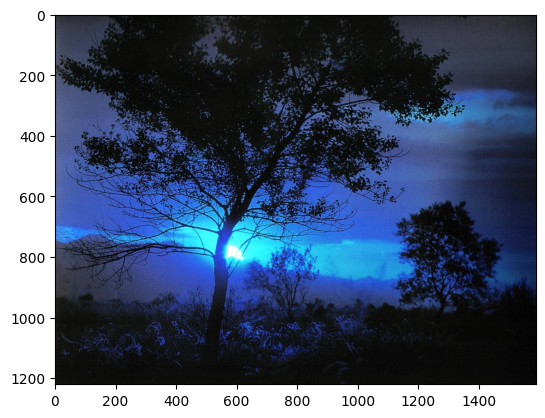

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('../../image_processing/img.jpg',cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

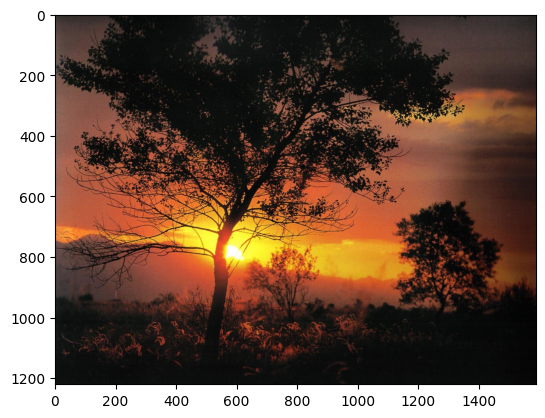

In [52]:
# from BGR to RGB
img_rgb = np.zeros_like(img)
img_rgb[:,:,[2,1,0]] = img[:,:,[0,1,2]]
plt.imshow(img_rgb)

Le trasformazioni con cv2, essendo implementate in C, mantengono la convenzione di C secondo cui le operazioni vengono direttamente applicate sull'immagine originale.

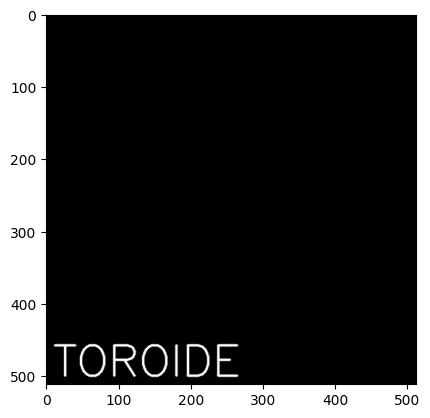

In [38]:
img_txt = np.zeros((512,512,3),np.uint8)
text = 'TOROIDE'
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_txt,text,(10,500),font,2,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img_txt)

Posso definire la trasformazione sulla base del risultato che voglio ottenere

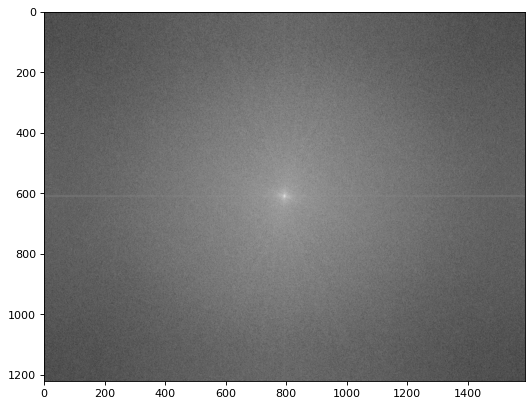

In [49]:
img = cv2.imread('../../image_processing/gray_img.jpg',cv2.IMREAD_COLOR)
img = img[:,:,0]
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(img/255.0))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')